In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow. keras import layers
from tensorflow.keras.models import Sequential

C:\Users\Pranav\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

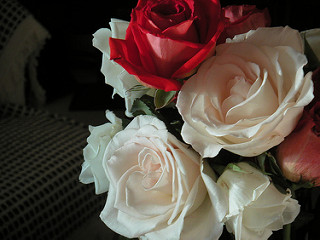

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X=np.array(X)
y=np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
len(X_train)

2752

In [20]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
                  

In [22]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.3255 - loss: 1.6318
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.5898 - loss: 1.0703
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.6447 - loss: 0.8797
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.7375 - loss: 0.6895
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.8373 - loss: 0.4729
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.8720 - loss: 0.3473
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.9238 - loss: 0.2391
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.9628 - loss: 0.1334
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.9809 - loss: 0.0885
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.9900 - loss: 0.0420


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6572 - loss: 1.6933


[1.7474095821380615, 0.655773401260376]

In [24]:
predictions=model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[ 7.9113483e+00,  1.3149808e+01, -7.8872180e-01, -1.5652706e+01,
        -1.2726730e-02],
       [ 1.1199063e+01,  3.1303365e+00, -6.5057874e+00, -4.7250686e+00,
         5.0779376e+00],
       [-2.2314169e+00,  3.4551430e+00,  8.1234913e+00, -1.1752897e+01,
        -4.7423239e+00],
       ...,
       [ 1.5605419e+00, -7.9640102e+00, -7.7766471e+00,  1.9883215e+00,
         5.0802622e+00],
       [ 3.1973741e+00, -2.0700488e+00, -1.8452957e+00, -4.8560576e+00,
         9.7500062e-01],
       [-1.1466764e+00, -1.0837417e+01, -1.3527544e+00,  3.0827541e+00,
         4.2235165e+00]], dtype=float32)

In [25]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.2803829e-03, 9.9471682e-01, 8.7957488e-07, 3.0826698e-13,
       1.9110994e-06], dtype=float32)>

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

In [28]:
img_height = 180  # Set the height of the images
img_width = 180   # Set the width of the images

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


C:\Users\Pranav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


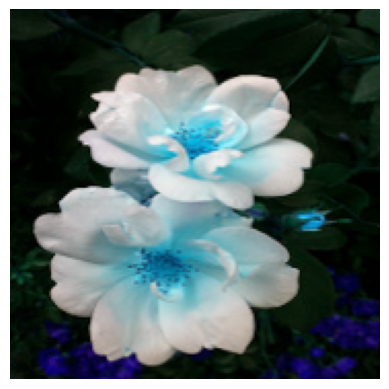

In [29]:
plt.axis('off')
plt.imshow(X[0])

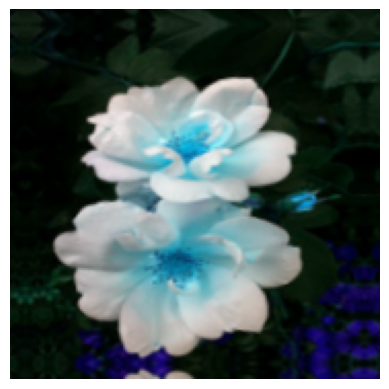

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [31]:
num_classes=5

model=Sequential([
#     cnn
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

In [34]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7400 - loss: 0.6597
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.7757 - loss: 0.5869
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7726 - loss: 0.5897
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.7739 - loss: 0.5658
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7876 - loss: 0.5255
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.8017 - loss: 0.5135
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.8087 - loss: 0.5234
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.8085 - loss: 0.4833
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.8000 - loss: 0.4962
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.8279 - loss: 0.4545
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8450 - loss: 0.4086
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7377 - loss: 1.1114


[1.0171658992767334, 0.7483659982681274]